##### DATA CLEANING AND ANALYSIS 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json
import ast
%matplotlib inline

In [ ]:
meta_data = pd.read_csv("movies_metadata.csv")

C:\Users\venka\AppData\Local\Temp\ipykernel_9480\3690386474.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data = pd.read_csv("movies_metadata.csv")


In [ ]:
meta_data.shape

(45466, 24)

##### There are few columns that is not required for any analysis in the future. SO dropping them 

In [ ]:
drop_df = ["homepage"]
meta_data = meta_data.drop(drop_df, axis=1) # drops the selected columns
meta_data = meta_data.drop_duplicates(keep='first') # removes the duplicates from existing dataframe
meta_data.dropna(how="all",inplace=True) # if each column is NaN or null in a row, drops this row

In [ ]:
meta_data.head(5)

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
meta_data.dropna(subset=["title"], inplace=True) #removing 
meta_data["id"] =pd.to_numeric(meta_data['id'], errors='coerce', downcast="integer")
meta_data["popularity"] =pd.to_numeric(meta_data['popularity'], errors='coerce', downcast="float") 
meta_data["budget"] =pd.to_numeric(meta_data['budget'], errors='coerce', downcast="float") 
meta_data['release_date'] = pd.to_datetime(meta_data['release_date'])
meta_data['release_year'] = meta_data['release_date'].dt.year

In [ ]:
meta_data.shape

(45447, 24)

##### After performing null title removing, 6 rows got deleted

In [ ]:
# returns the values and occurance times or "limiter" amount of different parameters in a 2D list
def list_counter(col, limiter = 9999, log = True):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    if log:
        print("Size of words:", len(result))
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    if log:
        print("Sorted result is:")
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result: 
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            if log:
                print(result[i], " - ", i) 
            returned.append([i, result[i]])
    if log:
        print("Covered:", sum_selected, "out of", total_selected, "\n")
    return returned

In [ ]:
meta_data.head(5)

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0


In [ ]:
meta_data.head(5)

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0


<AxesSubplot:xlabel='genres'>

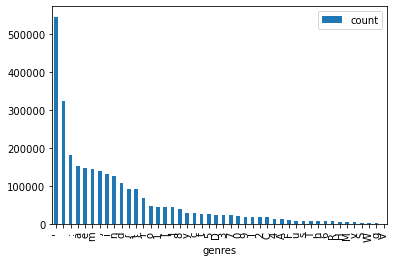

In [ ]:
genres_occur = list_counter(meta_data["genres"].values, log=False)
genres = pd.DataFrame.from_records(genres_occur, columns=["genres", "count"])
genres.plot(kind='bar', x='genres', rot=90)

In [ ]:
meta_data.shape
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45447 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45447 non-null  object        
 1   belongs_to_collection  4490 non-null   object        
 2   budget                 45447 non-null  float32       
 3   genres                 45447 non-null  object        
 4   id                     45447 non-null  int32         
 5   imdb_id                45430 non-null  object        
 6   original_language      45436 non-null  object        
 7   original_title         45447 non-null  object        
 8   overview               44493 non-null  object        
 9   popularity             45447 non-null  float32       
 10  poster_path            45064 non-null  object        
 11  production_companies   45447 non-null  object        
 12  production_countries   45447 non-null  object        
 13  r

In [ ]:
credits = pd.read_csv("credits.csv")
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
# converts json list to list of inputs (from the label specified with 'wanted' parameter)
def json_to_arr(cell, wanted = "name"): 
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [ ]:
credits["cast"] = credits[['cast']].applymap(json_to_arr)

In [ ]:
def get_director(x):
    x = literal_eval(x)
    for i in x:
        if i == "[]" or isinstance(i, float):
            return np.nan
        if i['job'] == 'Director':
            return i['name']
    return np.nan

credits['director'] = credits['crew'].apply(get_director)
credits.drop(["crew"], axis=1, inplace=True)

In [ ]:
print("Entries with no cast:", len(credits[credits["cast"].isna()]))
print("Entries with no directors:", len(credits[credits["director"].isna()]))
print("Entries missing both:", len(credits[(credits["cast"].isna())&(credits["director"].isna())]))
credits.drop(credits[(credits["cast"].isna())&(credits["director"].isna())].index, inplace=True)

Entries with no cast: 2418
Entries with no directors: 887
Entries missing both: 437


In [ ]:
rating = pd.read_csv("ratings.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


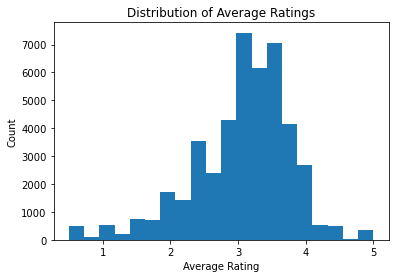

In [ ]:
# Calculate the average rating for each movie
movie_ratings = rating.groupby('movieId')['rating'].mean()


# Plot a histogram of the average ratings
plt.hist(movie_ratings, bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Average Ratings')
plt.show()



In [ ]:
small_links = pd.read_csv("links_small.csv")
small_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## The first algorithm is Demographic Filtering. In simple words Generalized Filtering for every user.

##### We are using TMDB rating to find weighted rating. The formula for the same is Weighted Rating (WR) =  ((v/v+m)*R)+((m/v+m)*C).  
##### Where  V is total votes for a movie
##### m is the minimum votes required to be listed in the chart
##### R is average rating of the movie
##### C is mean votes across report

#### logic in below cell is creating a new column in the DataFrame called 'genres', which contains a list of genre names for each movie in the original 'genres' column.

In [ ]:
meta_data['genres'] = meta_data['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
vote_counts = meta_data[meta_data['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = meta_data[meta_data['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
print("The mean votes across the report are : " ,C)

The mean votes across the report are :  5.244878649855876


##### To setup standard and performance of the data. We implementing 95th percentile of the dataframe to remove otliers and make sure all the data falls into same group

In [ ]:
m = vote_counts.quantile(0.95)
print("Minimum votes required for a movie : " ,m)

Minimum votes required for a movie :  434.0


 ##### creates a new 'year' column in the DataFrame by extracting the year information from the 'release_date' column, which is represented as a datetime object.

In [ ]:
meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [ ]:
qualified = meta_data[(meta_data['vote_count'] >= m) & (meta_data['vote_count'].notnull()) & (meta_data['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

In [ ]:
print("Displaying the qualified records with m value and notnull values ")
qualified


Displaying the qualified records with m value and notnull values 


,title,year,vote_count,vote_average,popularity,genres
0,Toy Story,1995,5415,7,21.946943,"[Animation, Comedy, Family]"
1,Jumanji,1995,2413,6,17.015539,"[Adventure, Fantasy, Family]"
5,Heat,1995,1886,7,17.924927,"[Action, Crime, Drama, Thriller]"
9,GoldenEye,1995,1194,6,14.686036,"[Adventure, Action, Thriller]"
15,Casino,1995,1343,7,10.137389,"[Drama, Crime]"
...,...,...,...,...,...,...
44624,What Happened to Monday,2017,598,7,60.581223,"[Science Fiction, Thriller]"
44632,Atomic Blonde,2017,748,6,14.455104,"[Action, Thriller]"
44678,Dunkirk,2017,2712,7,30.938854,"[Action, Drama, History, Thriller, War]"
44842,Transformers: The Last Knight,2017,1440,6,39.186817,"[Action, Science Fiction, Thriller, Adventure]"


##### We are using Bigdata Mapreduce function to achieve the rest of the job

In [ ]:
import pandas as pd


movies = []  # empty list to store movie tuple values
for index, row in qualified.iterrows():
    movie = (row['title'], row['vote_count'], row['vote_average'], m, C)
    movies.append(movie)



In [ ]:
# Define weighted_rating function that takes dataframe row as input and returns weighted score
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C) # Calculating weighted formula

# Mapper function that takes movie as input and returns title and score 
def weighted_rating_mapper(movie):
    title, vote_count, vote_average, m, C = movie
    x = {'vote_count': int(vote_count), 'vote_average': float(vote_average)}
    score = weighted_rating(x, m, C)
    return (title, score)

# reducer function takes mapper function output as input and returns calculated avg score for the movie
def weighted_rating_reducer(title, scores):
    total_score = 0
    num_scores = 0
    for score in scores:
        total_score += score
        num_scores += 1
    return (title, total_score / num_scores)


In [ ]:

# Map step
map_output = {} #empty dict that stores the movie as key and values are lists of scores 
for movie in movies:
    title, score = weighted_rating_mapper(movie)
    if title in map_output:
        map_output[title].append(score)
    else:
        map_output[title] = [score]

# Reduce step
reduce_output = [] #empty list to store outcome of reducer function
for title in map_output:
    reduce_output.append(weighted_rating_reducer(title, map_output[title]))

# Print top 10 movies
reduce_output.sort(key=lambda x: x[1], reverse=True)
for i in range(len(reduce_output)):
    print(f"{reduce_output[i][0]}: {reduce_output[i][1]}")


Inception: 7.917587520438173
The Dark Knight: 7.905870844212977
Interstellar: 7.897106732126104
Fight Club: 7.881752109774274
The Lord of the Rings: The Fellowship of the Ring: 7.871786117739379
Pulp Fiction: 7.868659636867031
The Shawshank Redemption: 7.863998786855943
The Lord of the Rings: The Return of the King: 7.861925789149821
Forrest Gump: 7.860654624640188
The Lord of the Rings: The Two Towers: 7.85192288966408
Star Wars: 7.834203734614178
Back to the Future: 7.820811828868193
The Godfather: 7.814846288949744
The Empire Strikes Back: 7.814097844222241
Se7en: 7.811667559306575
The Imitation Game: 7.811072418081443
The Lion King: 7.799173217003267
The Intouchables: 7.795393109862672
The Grand Budapest Hotel: 7.764528817258261
The Silence of the Lambs: 7.760039601452428
The Prestige: 7.758146709959031
Schindler's List: 7.754471731835205
Whiplash: 7.751409009155395
Leon: The Professional: 7.747044073204454
Memento: 7.740173258156769
The Green Mile: 7.740060290008141
Spirited Away:

The Invitation: 5.643779710910271
Batman: The Killing Joke: 5.643392093620729
Willow: 5.643003631849075
Sideways: 5.643003631849075
Ransom: 5.642224163796342
Veronica Mars: 5.642224163796342
Footloose: 5.641218752464922
8MM: 5.6410485586390475
Romancing the Stone: 5.640260520348463
The Forbidden Kingdom: 5.639865202238957
Leap Year: 5.639071953785738
The Frozen Ground: 5.638674017681863
Annie: 5.638275203131844
Anomalisa: 5.638275203131844
Red Eye: 5.637875507223702
The Awakening: 5.637474927032578
Tango & Cash: 5.636671102037084
The Best Exotic Marigold Hotel: 5.636671102037084
Hannah Montana: The Movie: 5.635458658551113
Billy Madison: 5.6350527105094095
On Her Majesty's Secret Service: 5.6350527105094095
Hellraiser: 5.6350527105094095
Bill & Ted's Excellent Adventure: 5.6350527105094095
Behind Enemy Lines: 5.6350527105094095
Blue Ruin: 5.6350527105094095
Hot Shots! Part Deux: 5.634645857343868
Alpha Dog: 5.634645857343868
The Way Back: 5.63423809602394
Look Who's Back: 5.63423809602

In [ ]:
len(reduce_output)

2240

In [ ]:
# Sort reduce_output by rating in decreasing order
sorted_output = sorted(reduce_output, key=lambda x: x[1], reverse=True)

# Print the sorted results
for title, rating in sorted_output:
    print(f"{title}: {rating}")


Inception: 7.917587520438173
The Dark Knight: 7.905870844212977
Interstellar: 7.897106732126104
Fight Club: 7.881752109774274
The Lord of the Rings: The Fellowship of the Ring: 7.871786117739379
Pulp Fiction: 7.868659636867031
The Shawshank Redemption: 7.863998786855943
The Lord of the Rings: The Return of the King: 7.861925789149821
Forrest Gump: 7.860654624640188
The Lord of the Rings: The Two Towers: 7.85192288966408
Star Wars: 7.834203734614178
Back to the Future: 7.820811828868193
The Godfather: 7.814846288949744
The Empire Strikes Back: 7.814097844222241
Se7en: 7.811667559306575
The Imitation Game: 7.811072418081443
The Lion King: 7.799173217003267
The Intouchables: 7.795393109862672
The Grand Budapest Hotel: 7.764528817258261
The Silence of the Lambs: 7.760039601452428
The Prestige: 7.758146709959031
Schindler's List: 7.754471731835205
Whiplash: 7.751409009155395
Leon: The Professional: 7.747044073204454
Memento: 7.740173258156769
The Green Mile: 7.740060290008141
Spirited Away:

The A-Team: 5.849045294351659
Due Date: 5.849045294351659
Top Gun: 5.848975729971176
Bad Boys: 5.848486978288235
The Transporter: 5.848135928654981
Zero Dark Thirty: 5.848065523429509
Hitch: 5.847924516954732
The Ring: 5.847853915523422
Tropic Thunder: 5.8469300953000705
Batman Returns: 5.84685856730722
Central Intelligence: 5.846355993454033
Bridesmaids: 5.846211794480267
The Internship: 5.8457775689588
The Place Beyond the Pines: 5.845632281694513
Escape Plan: 5.845559535361664
Ace Ventura: Pet Detective: 5.845267863096057
The Adjustment Bureau: 5.844754776900734
8 Mile: 5.844681200965616
War for the Planet of the Apes: 5.844607555257207
Van Helsing: 5.84453383967621
The Chronicles of Narnia: Prince Caspian: 5.844090073281375
Alien³: 5.84379281889297
Total Recall: 5.843080531679556
The Mortal Instruments: City of Bones: 5.842667947209529
From Dusk Till Dawn: 5.84228938115373
One Hundred and One Dalmatians: 5.842213449223616
American Reunion: 5.842061365801181
Kung Fu Panda 3: 5.84121

Elle: 5.648366238237607
For Your Eyes Only: 5.647988543541837
Talladega Nights: The Ballad of Ricky Bobby: 5.647988543541837
August: Osage County: 5.647988543541837
Macbeth: 5.647988543541837
Edge of Darkness: 5.647610036599409
[REC]²: 5.647610036599409
Blitz: 5.647610036599409
Aladdin and the King of Thieves: 5.64685057547139
The X Files: 5.64685057547139
Mirrors: 5.64685057547139
A Serious Man: 5.6460878337337475
Hocus Pocus: 5.645705225986433
Jay and Silent Bob Strike Back: 5.645705225986433
Hoodwinked!: 5.645705225986433
Maverick: 5.64532179008382
Star Trek IV: The Voyage Home: 5.64532179008382
Before We Go: 5.64532179008382
State of Play: 5.644937523334182
Star Trek: Nemesis: 5.644552423034112
eXistenZ: 5.644166486468459
The Invitation: 5.643779710910271
Batman: The Killing Joke: 5.643392093620729
Willow: 5.643003631849075
Sideways: 5.643003631849075
Ransom: 5.642224163796342
Veronica Mars: 5.642224163796342
Footloose: 5.641218752464922
8MM: 5.6410485586390475
Romancing the Stone:

The Day the Earth Stood Still: 5.071279231413447
You Don't Mess with the Zohan: 5.0707572130742005
Mortdecai: 5.07028924208826
Little Fockers: 5.069644386656258
Unfriended: 5.069644386656258
Transporter 3: 5.068832470231509
Die Another Day: 5.068743424345052
The Boy: 5.067822165946043
Resident Evil: The Final Chapter: 5.06756346728382
Dumb and Dumber To: 5.067520542590502
Date Night: 5.067179098633027
Mirror Mirror: 5.067179098633027
Snitch: 5.066883155467243
Ice Age: Collision Course: 5.066257689549532
Grown Ups 2: 5.06584717102692
The League of Extraordinary Gentlemen: 5.065806398784798
Hitman: Agent 47: 5.065725005589023
Trainwreck: 5.065321041203104
Evan Almighty: 5.065280917713421
Jack Ryan: Shadow Recruit: 5.065280917713421
The Smurfs: 5.065001427545841
The Bling Ring: 5.0648427907489015
Bee Movie: 5.0647243203638554
Alvin and the Chipmunks: 5.064567031614489
Surrogates: 5.064293608008136
How to Be Single: 5.064061081396896
Mechanic: Resurrection: 5.063639122178114
AVP: Alien vs.

In [ ]:
# sorted_output
sorted_output[0:5]

[('Inception', 7.917587520438173),
 ('The Dark Knight', 7.905870844212977),
 ('Interstellar', 7.897106732126104),
 ('Fight Club', 7.881752109774274),
 ('The Lord of the Rings: The Fellowship of the Ring', 7.871786117739379)]

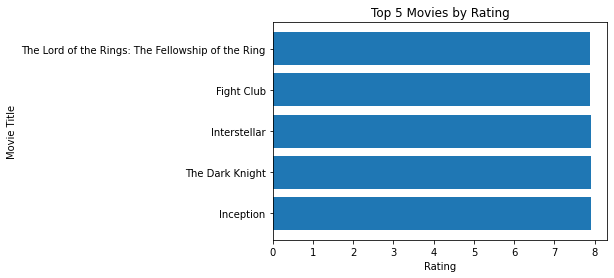

In [ ]:
movie_list=[]
rating_list=[]
for movie, rating in sorted_output[0:5]:
    movie_list.append(movie)
    rating_list.append(rating)
top_five_df = pd.DataFrame({
    'movie_title': movie_list,
    'rating': rating_list
})

# Sort the dataframe by rating in descending order
sorted_df = top_five_df.sort_values('rating', ascending=False)

# Get the top 5 movie titles and ratings
top_movies = sorted_df.head(5)

# Create a horizontal bar chart
plt.barh(top_movies['movie_title'], top_movies['rating'])
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.title('Top 5 Movies by Rating')
plt.show()


In [ ]:
genre_df=qualified[['title','genres']]
rated_df=pd.DataFrame(sorted_output, columns=['title', 'rating'])
merged_df=pd.merge(genre_df,rated_df,on='title')

In [ ]:
final_df=merged_df.explode('genres')

In [ ]:
filter_df=final_df[final_df['genres']=='Comedy']
final_df = filter_df.sort_values(by='rating', ascending=False)

In [ ]:
final_df.head(5)

,title,genres,rating
52,Forrest Gump,Comedy,7.860655
206,Back to the Future,Comedy,7.820812
1577,The Intouchables,Comedy,7.795393
1829,The Grand Budapest Hotel,Comedy,7.764529
376,Life Is Beautiful,Comedy,7.706715


## **Content Based Recomendation system**

In [ ]:
import warnings; warnings.simplefilter('ignore')

In [ ]:
small_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
# This code filters the 'tmdbId' column of the DataFrame object small_links to include only rows where the value of 'tmdbId' is not null.
# The resulting DataFrame is assigned back to small_links.
# The 'tmdbId' column of the filtered df1 is cast to an integer data type using the 'astype()' method.
# The resulting Series object is assigned back to df1, effectively replacing the original 'tmdbId' column.
small_links = small_links[small_links['tmdbId'].notnull()]['tmdbId'].astype('int')
## The 'head()' method is called to print the first 3 rows of the resulting DataFrame.
# This is useful for checking that the filtering and type conversion were successful.
small_links.head(3)

0      862
1     8844
2    15602
Name: tmdbId, dtype: int32

In [ ]:
meta_data.head(5)

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0,1995
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,1995
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,1995


In [ ]:
# changing the data type as integer
meta_data['id'] = meta_data['id'].astype('int')

In [ ]:
# Filter rows of meta_data where the 'id' column value is found in df1
smd = meta_data[meta_data['id'].isin(small_links)]
# Print the shape (number of rows and columns) of the smd DataFrame
smd.shape

(9092, 25)

In [ ]:
smd

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0,1995
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,1995
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40224,False,NaN,15000000.0,"[Action, Adventure, Drama, Horror, Science Fic...",315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.285519,...,120.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,2016.0,2016
40503,False,NaN,0.0,"[Documentary, Music]",391698,tt2531318,en,The Beatles: Eight Days a Week - The Touring Y...,"The band stormed Europe in 1963, and, in 1964,...",7.078301,...,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The band you know. The story you don't.,The Beatles: Eight Days a Week - The Touring Y...,False,7.6,92.0,2016.0,2016
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000.0,"[Adventure, Fantasy, Animation, Action, Family]",10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,6.480376,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0,2000.0,2000
44826,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0.0,"[Adventure, Fantasy, Animation, Science Fictio...",12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",6.080108,...,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0,2001.0,2001


##### Movie Description Based Recommender

##### build a recommender system using movie descriptions and taglines.

In [ ]:
# Fill missing values in the 'tagline' column with an empty string
smd['tagline'] = smd['tagline'].fillna('')

# Concatenate the 'overview' and 'tagline' columns into the 'description' column
smd['description'] = smd['overview'] + smd['tagline']

# Fill missing values in the 'description' column with an empty string
smd['description'] = smd['description'].fillna('')


In [ ]:
smd

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,year,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7.7,5415.0,1995.0,1995,"Led by Woody, Andy's toys live happily in his ..."
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,1995,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,1995,A family wedding reignites the ancient feud be...
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,1995,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,1995,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40224,False,NaN,15000000.0,"[Action, Adventure, Drama, Horror, Science Fic...",315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.285519,...,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,2016.0,2016,From the mind behind Evangelion comes a hit la...
40503,False,NaN,0.0,"[Documentary, Music]",391698,tt2531318,en,The Beatles: Eight Days a Week - The Touring Y...,"The band stormed Europe in 1963, and, in 1964,...",7.078301,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The band you know. The story you don't.,The Beatles: Eight Days a Week - The Touring Y...,False,7.6,92.0,2016.0,2016,"The band stormed Europe in 1963, and, in 1964,..."
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000.0,"[Adventure, Fantasy, Animation, Action, Family]",10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,6.480376,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0,2000.0,2000,When Molly Hale's sadness of her father's disa...
44826,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0.0,"[Adventure, Fantasy, Animation, Science Fictio...",12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",6.080108,...,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0,2001.0,2001,"All your favorite Pokémon characters are back,..."


##### Cosine similarity


##### We will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

##### cosine(x,y)=x.y⊺||x||.||y|| 

##### Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Import the TfidfVectorizer from scikit-learn

In [ ]:
# Initialize the TfidfVectorizer object with specified options:
# - analyzer: specifies whether to use 'word' or 'char' n-grams
# - ngram_range: the range of n-gram sizes to include in the analysis
# - min_df: the minimum frequency a word must have in the document set to be included
# - stop_words: specifies whether to remove English stop words
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])
tfidf_matrix

<9092x268124 sparse matrix of type '<class 'numpy.float64'>'
	with 540113 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.shape

(9092, 268124)

In [ ]:
# This code calculates the cosine similarity between each pair of rows in a tf-idf matrix using the cosine_similarity() function from scikit-learn
# The tf-idf matrix is passed twice to cosine_similarity() to calculate the similarity between each pair of rows
# The resulting cosine similarity matrix is stored in the variable cosine_sim
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# This code retrieves the 5th row of the cosine similarity matrix and prints it out
# The 5th row of the cosine similarity matrix contains the cosine similarity scores for the 5th movie with all other movies
# The cosine similarity score between the 5th movie and itself is 1.0, as expected
# The cosine similarity score between the 5th movie and other movies can be used to find similar movies to the 5th movie
cosine_sim[4]

array([0.        , 0.00223856, 0.0078982 , ..., 0.00437522, 0.00138866,
       0.        ])

In [ ]:
# Reset the index of the DataFrame "smd" to default integer index
smd = smd.reset_index()

# Extract the 'title' column from the modified "smd" DataFrame into a new variable called "titles"
titles = smd['title']

# Create a Pandas Series called "indices" with the index as the 'title' column from the modified "smd" DataFrame,
# and the values as the corresponding integer index of the row in the "smd" DataFrame
indices = pd.Series(smd.index, index=smd['title'])


In [ ]:
def get_recommendations(title):
    # First, retrieve the index of the movie title in the 'indices' dictionary.
    idx = indices[title]
    
    # Print out the index (for debugging purposes).
    print(idx)
    
    # Calculate the cosine similarity scores for the selected movie against all the other movies.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the similarity scores in descending order, so the most similar movies appear first.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Select the top 30 most similar movies, excluding the selected movie itself (which will have a similarity score of 1.0).
    sim_scores = sim_scores[1:31]
    
    # Extract the indices of the recommended movies from the similarity score list.
    movie_indices = [i[0] for i in sim_scores]
    
    # Look up the movie titles for the recommended indices in the 'titles' DataFrame, and return the results.
    return titles.iloc[movie_indices]


In [ ]:
pd.DataFrame(cosine_sim) # Displaying the data frame



,0,1,2,3,4,5,6,7,8,9,...,9082,9083,9084,9085,9086,9087,9088,9089,9090,9091
0,1.000000,0.006804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005669,0.000000,0.000000,0.000000,0.000000,0.004779,0.000000,0.003449,0.00000
1,0.006804,1.000000,0.015309,0.000000,0.002239,0.014745,0.000000,0.000000,0.033132,0.000000,...,0.000000,0.006702,0.000000,0.000000,0.000000,0.001749,0.003676,0.003574,0.007623,0.00000
2,0.000000,0.015309,1.000000,0.000000,0.007898,0.000000,0.000000,0.002348,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002311,0.001927,0.002209,0.000000,0.000000,0.002865,0.00472
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.002151,0.000000,0.006532,0.000000,0.000000,...,0.016813,0.000000,0.003569,0.001991,0.000000,0.000000,0.000000,0.000000,0.008672,0.00000
4,0.000000,0.002239,0.007898,0.000000,1.000000,0.000000,0.008261,0.000000,0.011419,0.000000,...,0.000000,0.000000,0.006024,0.003361,0.000000,0.003801,0.001870,0.004375,0.001389,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,0.000000,0.001749,0.002209,0.000000,0.003801,0.000000,0.000000,0.000000,0.000000,0.005136,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001461,0.003418,0.005869,0.00000
9088,0.004779,0.003676,0.000000,0.000000,0.001870,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005600,0.000000,0.000000,0.000000,0.001461,1.000000,0.006278,0.000948,0.00000
9089,0.000000,0.003574,0.000000,0.000000,0.004375,0.000000,0.000000,0.004257,0.004224,0.000000,...,0.020035,0.000000,0.000000,0.000000,0.000000,0.003418,0.006278,1.000000,0.078117,0.00000
9090,0.003449,0.007623,0.002865,0.008672,0.001389,0.008314,0.000000,0.007130,0.002491,0.000000,...,0.000000,0.001331,0.000000,0.000000,0.000000,0.005869,0.000948,0.078117,1.000000,0.00000


In [ ]:
sim_scores = list(enumerate(cosine_sim[2]))

##### This line of code is assigning a list of tuples to the variable sim_scores, where each tuple contains an index and a cosine similarity score for a movie with respect to a particular movie. Here's a breakdown of what each part of this code does:

##### cosine_sim[2]: This is indexing the cosine_sim matrix to retrieve the row corresponding to the third movie in the dataset. The cosine_sim matrix is a matrix of pairwise cosine similarity scores between all movies in the dataset.


##### enumerate(cosine_sim[2]): This function call is creating an iterator that returns tuples containing the index of each element in cosine_sim[2] and the element itself. The index is represented by the first element of the tuple, while the cosine similarity score is represented by the second element.


##### list(enumerate(cosine_sim[2])): This converts the iterator returned by enumerate into a list of tuples.
##### sim_scores = list(enumerate(cosine_sim[2])): This assigns the list of tuples to the variable sim_scores.

In [ ]:
# Call the get_recommendations function with 'Rustom' as input and retrieve the first 10 recommended movies
get_recommendations('Felon').head(10)

6986


5056                                 Dark Passage
8099                   Paradise Lost 3: Purgatory
9010                       Manson Family Vacation
2988                                     Badlands
6752                                 Shoot 'Em Up
6796                      Chilly Scenes of Winter
5029    Aileen: Life and Death of a Serial Killer
9085                                       Rustom
8118                                  Holy Motors
2769                           A Place in the Sun
Name: title, dtype: object

###### Metadata Based Recommender

In [ ]:
# Read the 'keywords.csv' file into a pandas DataFrame object called 'keywords'
credits = pd.read_csv("credits.csv")
keywords = pd.read_csv("keywords.csv")

In [ ]:
# Convert the 'id' column of the 'keywords' DataFrame to integer type
keywords['id'] = keywords['id'].astype('int')

# Convert the 'id' column of the 'credits' DataFrame to integer type
credits['id'] = credits['id'].astype('int')

# Convert the 'id' column of the 'df2' DataFrame to integer type
meta_data['id'] = meta_data['id'].astype('int')
meta_data

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0,1995
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,1995
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0.0,"[Drama, Family]",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaT
45462,False,NaN,0.0,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,2011.0,2011
45463,False,NaN,0.0,"[Action, Drama, Thriller]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003.0,2003
45464,False,NaN,0.0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917.0,1917


In [ ]:
meta_data.shape

(45447, 25)

In [ ]:
# Merge the "df2" DataFrame with the "credits" DataFrame on the common column "id"
meta_data = meta_data.merge(credits, on='id')
# Merge the resulting DataFrame from the previous merge with the "keywords" DataFrame on the common column "id"
meta_data = meta_data.merge(keywords, on='id')
# Print the resulting merged DataFrame
meta_data

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,video,vote_average,vote_count,release_year,year,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,NaN,Toy Story,False,7.7,5415.0,1995.0,1995,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,1995,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,1995,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,1995,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,1995,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46557,False,NaN,0.0,"[Drama, Family]",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaT,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...","[{'id': 10703, 'name': 'tragic love'}]"
46558,False,NaN,0.0,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,NaN,Century of Birthing,False,9.0,3.0,2011.0,2011,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...","[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46559,False,NaN,0.0,"[Action, Drama, Thriller]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,A deadly game of wits.,Betrayal,False,3.8,6.0,2003.0,2003,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",[]
46560,False,NaN,0.0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,NaN,Satan Triumphant,False,0.0,0.0,1917.0,1917,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",[]


In [ ]:
# Select rows from a DataFrame "df2" based on matching values in the "id" column with another DataFrame "df1"
smd = meta_data[meta_data['id'].isin(small_links)]

# Print the dimensions (number of rows, number of columns) of the resulting DataFrame "smd"
smd.shape



(9191, 28)

In [ ]:
smd

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,video,vote_average,vote_count,release_year,year,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,NaN,Toy Story,False,7.7,5415.0,1995.0,1995,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,1995,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,1995,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,1995,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,1995,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40886,False,NaN,8000000.0,[Drama],159550,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,0.038998,...,NaN,The Last Brickmaker in America,False,7.0,1.0,2001.0,2001,"[{'cast_id': 1, 'character': 'Henry Cobb', 'cr...","[{'credit_id': '544475aac3a36819fb000578', 'de...","[{'id': 6054, 'name': 'friendship'}, {'id': 20..."
41106,False,NaN,1000000.0,"[Thriller, Romance]",392572,tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",7.333139,...,Decorated Officer. Devoted Family Man. Defendi...,Rustom,False,7.3,25.0,2016.0,2016,"[{'cast_id': 0, 'character': 'Rustom Pavri', '...","[{'credit_id': '5951baf692514129c4016600', 'de...","[{'id': 10540, 'name': 'bollywood'}]"
41159,False,NaN,15050000.0,"[Adventure, Drama, History, Romance]",402672,tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,...,NaN,Mohenjo Daro,False,6.7,26.0,2016.0,2016,"[{'cast_id': 0, 'character': 'Sarman', 'credit...","[{'credit_id': '57cd5d3592514179d50018e8', 'de...","[{'id': 10540, 'name': 'bollywood'}]"
41325,False,NaN,15000000.0,"[Action, Adventure, Drama, Horror, Science Fic...",315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.285519,...,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,2016.0,2016,"[{'cast_id': 4, 'character': 'Rando Yaguchi : ...","[{'credit_id': '560892fa92514177550018b2', 'de...","[{'id': 1299, 'name': 'monster'}, {'id': 7671,..."


##### It selects rows from a pandas DataFrame called "df2" that have a value in the "id" column that matches a value in another DataFrame called "df1". The resulting DataFrame is assigned to a new variable called "smd".

##### The ".shape" attribute of the "smd" DataFrame is then printed, which returns the dimensions of the DataFrame as a tuple (number of rows, number of columns).

##### Data Manipulation
##### This code is manipulating a pandas DataFrame called smd, which presumably contains information about movies.

In [ ]:
import ast

In [ ]:
# Convert the 'cast', 'crew', and 'keywords' columns from string representations of lists to actual lists
# smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
# Add new columns to the smd DataFrame that represent the size of the 'cast' and 'crew' lists for each movie
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))


##### The apply() method is used to apply the literal_eval() function to the 'cast', 'crew', and 'keywords' columns of the smd DataFrame. 

##### literal_eval()  safely evaluates a string containing a Python literal or container. In this case, it is used to convert strings in the 'cast', 'crew', and 'keywords' columns into actual lists of values.

##### creating two new columns in the smd DataFrame, 'cast_size' and 'crew_size', which correspond to the number of elements in the 'cast' and 'crew' lists, respectively

##### The lambda function takes in each row of the 'cast' and 'crew' columns and returns the length of the corresponding list

In [ ]:

import numpy as np

# Define a function called get_director that takes a list of dictionaries as input
def get_director(x):
    # Iterate over each dictionary in the list
    for i in x:
        # Check if the value associated with the key 'job' is equal to 'Director'
        if i['job'] == 'Director':
            # If the condition is true, return the value associated with the key 'name'
            return i['name']
    # If none of the dictionaries in the list have a 'job' key with the value 'Director', return np.nan
    return np.nan


In [ ]:
smd['director'] = smd['crew'].apply(get_director)
#  smd['director'] = smd['crew'].apply(get_director) assigns a new column called "director" to a pandas DataFrame(smd).
#The values in this new column are obtained by applying the function get_director to each value in the "crew" column of the "smd" DataFrame.

In [ ]:
# This line applies a lambda function to the 'cast' column of the DataFrame
# The lambda function converts each element of the 'cast' column (which is a list of dictionaries) into a list of actor names
# If an element is not a list, the lambda function returns an empty list
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# This line applies another lambda function to the 'cast' column of the DataFrame
# The lambda function ensures that each element of the 'cast' column contains only the first three actors in the cast list (if there are at least three actors)
# If the cast list has fewer than three actors, the lambda function does not modify the list
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)


 ##### The cast column of the DataFrame smd so that it contains a list of the first three actors in each movie's cast, with each actor represented as a string. If a movie has fewer than three actors in its cast, the list is left unmodified. These modifications can make it easier to analyze and compare the casts of different movies.

In [ ]:
  # Create a new column called 'keywords' in the 'smd' DataFrame.
  # Check if the value is a list
smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
smd # Displaying the results

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,vote_average,vote_count,release_year,year,cast,crew,keywords,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,7.7,5415.0,1995.0,1995,[],"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",2632,106,John Lasseter
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,6.9,2413.0,1995.0,1995,[],"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",5023,16,Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,6.5,92.0,1995.0,1995,[],"[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o...",1431,4,Howard Deutch
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,6.1,34.0,1995.0,1995,[],"[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin...",2046,10,Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,5.7,173.0,1995.0,1995,[],"[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug...",2457,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40886,False,NaN,8000000.0,[Drama],159550,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,0.038998,...,7.0,1.0,2001.0,2001,[],"[{'credit_id': '544475aac3a36819fb000578', 'de...","[friendship, brick making]",1357,2,Gregg Champion
41106,False,NaN,1000000.0,"[Thriller, Romance]",392572,tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",7.333139,...,7.3,25.0,2016.0,2016,[],"[{'credit_id': '5951baf692514129c4016600', 'de...",[bollywood],2828,16,Tinu Suresh Desai
41159,False,NaN,15050000.0,"[Adventure, Drama, History, Romance]",402672,tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,...,6.7,26.0,2016.0,2016,[],"[{'credit_id': '57cd5d3592514179d50018e8', 'de...",[bollywood],2267,16,Ashutosh Gowariker
41325,False,NaN,15000000.0,"[Action, Adventure, Drama, Horror, Science Fic...",315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.285519,...,6.6,152.0,2016.0,2016,[],"[{'credit_id': '560892fa92514177550018b2', 'de...","[monster, godzilla, giant monster, destruction...",11483,27,Hideaki Anno


### Building a Recommender System for Movies - Approach to Data Preparation

Here our approach is to build the recommender system for movies is in the first step is to create a metadata dump for every movie which consists of genres, director, main actors and keywords.

### Preparation of Genres and Credits Data

To prepare the genres and credits data:

### Strip Spaces and Convert to Lowercase:
 I strip all spaces and convert the text to lowercase from all our features. This way, our engine will not confuse between Johnny Depp and Johnny Galecki, for example.

### Mention Director 3 times:
 To give more weight to the director relative to the entire cast, I mention the director three times in the metadata dump.

Count Vectorizer to Create Count Matrix
After preparing the metadata dump, the next step is to use a Count Vectorizer to create our count matrix, as we did in the Description Recommender. This count matrix will represent the frequency of each term (genres, director, actors, and keywords) in the metadata dump.

Calculate Cosine Similarities and Recommend Movies
With the count matrix in place, the remaining steps are similar to what we did earlier: we calculate the cosine similarities between the movies and return movies that are most similar.

In [ ]:
# Convert all cast member names to lowercase and remove any spaces
# For each movie, apply a lambda function to its cast list
# The lambda function processes each cast member's name as follows:
#   1. Removes any spaces in the name using replace()
#   2. Converts the name to lowercase using lower()
#   3. Returns the processed name
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [ ]:
#This line of code converts the 'director' column of the smd DataFrame to a string data type, removes any spaces in the string, and makes all characters lowercase.
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
#This line of code takes the 'director' column and applies a lambda function that creates a list of three identical strings for each value in the column.
smd['director'] = smd['director'].apply(lambda x: [x,x, x])
smd

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,vote_average,vote_count,release_year,year,cast,crew,keywords,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,7.7,5415.0,1995.0,1995,[],"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",2632,106,"[johnlasseter, johnlasseter, johnlasseter]"
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,6.9,2413.0,1995.0,1995,[],"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",5023,16,"[joejohnston, joejohnston, joejohnston]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,6.5,92.0,1995.0,1995,[],"[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o...",1431,4,"[howarddeutch, howarddeutch, howarddeutch]"
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,6.1,34.0,1995.0,1995,[],"[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin...",2046,10,"[forestwhitaker, forestwhitaker, forestwhitaker]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,5.7,173.0,1995.0,1995,[],"[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug...",2457,7,"[charlesshyer, charlesshyer, charlesshyer]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40886,False,NaN,8000000.0,[Drama],159550,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,0.038998,...,7.0,1.0,2001.0,2001,[],"[{'credit_id': '544475aac3a36819fb000578', 'de...","[friendship, brick making]",1357,2,"[greggchampion, greggchampion, greggchampion]"
41106,False,NaN,1000000.0,"[Thriller, Romance]",392572,tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",7.333139,...,7.3,25.0,2016.0,2016,[],"[{'credit_id': '5951baf692514129c4016600', 'de...",[bollywood],2828,16,"[tinusureshdesai, tinusureshdesai, tinusureshd..."
41159,False,NaN,15050000.0,"[Adventure, Drama, History, Romance]",402672,tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,...,6.7,26.0,2016.0,2016,[],"[{'credit_id': '57cd5d3592514179d50018e8', 'de...",[bollywood],2267,16,"[ashutoshgowariker, ashutoshgowariker, ashutos..."
41325,False,NaN,15000000.0,"[Action, Adventure, Drama, Horror, Science Fic...",315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.285519,...,6.6,152.0,2016.0,2016,[],"[{'credit_id': '560892fa92514177550018b2', 'de...","[monster, godzilla, giant monster, destruction...",11483,27,"[hideakianno, hideakianno, hideakianno]"


In [ ]:
#calculating the frequency counts of every keyword that appears in the dataset.
s = smd.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s = smd['keywords'].explode().value_counts()
s[:5]


independent film        606
woman director          546
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keywords, dtype: int64

In [ ]:
s = s.loc[s > 1]


In [ ]:

#imports the SnowballStemmer class from the nltk.stem library
from nltk.stem import SnowballStemmer
#SnowballStemmer('english') creates a stemmer object specifically for English words.
stemmer = SnowballStemmer('english')
#This calls the stem() function on the 'dogs' string using the SnowballStemmer object and returns the stemmed word 'dog'
stemmer.stem('dogs')

'dog'

In [ ]:
def filter_keywords(x):
    # create an empty list to store the filtered words
    words = []
    # loop through each word in the input list 'x'
    for i in x:
        # check if the current word 'i' is present in the pre-defined 's' list
        if i in s:
            # if the word is present, append it to the 'words' list
            words.append(i)
    # return the list of filtered words
    return words


In [ ]:
# # Apply filter_keywords function to smd['keywords'] column to only keep relevant keywords
smd['keywords'] = smd['keywords'].apply(filter_keywords)

# # Apply SnowballStemmer to each keyword to reduce them to their root form
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])

# # Convert all remaining keywords to lowercase and remove spaces between words
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])



##### This above code cleans and preprocesses the keywords in the smd DataFrame. 

##### First, the filter_keywords function is applied to the keywords column to only keep the relevant keywords based on their frequency in the dataset. 

##### Then, each keyword is stemmed using the SnowballStemmer, which reduces the word to its root form. Finally, all remaining keywords are converted to lowercase and spaces between words are removed.

In [ ]:
## Concatenate the 'keywords', 'cast', 'director', and 'genres' columns into a new column called 'soup'
## Convert the list of words in 'soup' into a single string
smd['soup'] = smd.apply(lambda x: ' '.join(x['keywords']) + ' ' +
                                  ' '.join(x['cast']) + ' ' +
                                  ' '.join(x['director']) + ' ' +
                                  ' '.join(x['genres']), axis=1)


##### The above code is to create a new feature called 'soup', which combines various columns of the dataset into a single string. This new feature will be used to calculate similarity scores between movies later in the content-based recommendation system. The + operator is used to concatenate the values of each column for each movie into a single list, and then the join() method is used to join the elements of each list with a space between them, creating a string of words that represents each movie.

In [ ]:
# Displaying smd
smd

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,vote_count,release_year,year,cast,crew,keywords,cast_size,crew_size,director,soup
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,5415.0,1995.0,1995,[],"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousi, toy, boy, friendship, friend, rival...",2632,106,"[johnlasseter, johnlasseter, johnlasseter]",jealousi toy boy friendship friend rivalri boy...
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,2413.0,1995.0,1995,[],"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[boardgam, disappear, basedonchildren'sbook, n...",5023,16,"[joejohnston, joejohnston, joejohnston]",boardgam disappear basedonchildren'sbook newho...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,92.0,1995.0,1995,[],"[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fish, bestfriend, duringcreditssting]",1431,4,"[howarddeutch, howarddeutch, howarddeutch]",fish bestfriend duringcreditssting howarddeut...
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,34.0,1995.0,1995,[],"[{'credit_id': '52fe44779251416c91011acb', 'de...","[basedonnovel, interracialrelationship, single...",2046,10,"[forestwhitaker, forestwhitaker, forestwhitaker]",basedonnovel interracialrelationship singlemot...
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,173.0,1995.0,1995,[],"[{'credit_id': '52fe44959251416c75039ed7', 'de...","[babi, midlifecrisi, confid, age, daughter, mo...",2457,7,"[charlesshyer, charlesshyer, charlesshyer]",babi midlifecrisi confid age daughter motherda...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40886,False,NaN,8000000.0,[Drama],159550,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,0.038998,...,1.0,2001.0,2001,[],"[{'credit_id': '544475aac3a36819fb000578', 'de...",[friendship],1357,2,"[greggchampion, greggchampion, greggchampion]",friendship greggchampion greggchampion greggc...
41106,False,NaN,1000000.0,"[Thriller, Romance]",392572,tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",7.333139,...,25.0,2016.0,2016,[],"[{'credit_id': '5951baf692514129c4016600', 'de...",[bollywood],2828,16,"[tinusureshdesai, tinusureshdesai, tinusureshd...",bollywood tinusureshdesai tinusureshdesai tin...
41159,False,NaN,15050000.0,"[Adventure, Drama, History, Romance]",402672,tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,...,26.0,2016.0,2016,[],"[{'credit_id': '57cd5d3592514179d50018e8', 'de...",[bollywood],2267,16,"[ashutoshgowariker, ashutoshgowariker, ashutos...",bollywood ashutoshgowariker ashutoshgowariker...
41325,False,NaN,15000000.0,"[Action, Adventure, Drama, Horror, Science Fic...",315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.285519,...,152.0,2016.0,2016,[],"[{'credit_id': '560892fa92514177550018b2', 'de...","[monster, godzilla, giantmonst, destruct, kaiju]",11483,27,"[hideakianno, hideakianno, hideakianno]",monster godzilla giantmonst destruct kaiju hi...


In [ ]:
# Import the CountVectorizer module from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object with the desired settings
# analyzer='word' specifies that the feature should be made up of words
# ngram_range=(1, 2) specifies that we want to include both unigrams and bigrams
# min_df=0 specifies that we want to include all words that appear in the data
# stop_words='english' specifies that we want to remove common English stop words
count = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')

# Use the fit_transform method of the CountVectorizer object to convert the 'soup' column
# of the smd DataFrame into a matrix of features
count_matrix = count.fit_transform(smd['soup'])



##### Here, we convert the 'soup' column of the smd DataFrame (which contains a concatenated string of important features for each movie) into a matrix of features that can be used to calculate similarity between movies.

##### The CountVectorizer object is used to convert the text data into a numerical format that can be processed by machine learning algorithms. The resulting count_matrix object will have one row for each movie and one column for each unique word or bigram that appears in the 'soup' column. The value in each cell of the matrix will be the count of the corresponding word or bigram in the 'soup' string for the corresponding movie.

In [ ]:
# caluclating the similarity 
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Resetting the index of the 'smd' DataFrame so that we can access the 'title' column as a normal column
smd = smd.reset_index()
# Extracting the 'title' column from the 'smd' DataFrame and storing it in 'titles'
titles = smd['title']
# Creating a Pandas Series 'indices' with the index as the 'title' column of 'smd' and the values as the corresponding index
indices = pd.Series(smd.index, index=smd['title'])

In [ ]:
get_recommendations('Interstellar').head(10)

8585


7628                Inception
2081                Following
6611             The Prestige
3377                  Memento
4141                 Insomnia
6969          The Dark Knight
8007    The Dark Knight Rises
4149           Silent Running
6206            Batman Begins
129                 Apollo 13
Name: title, dtype: object

In [ ]:
get_recommendations('Ghosts of Girlfriends Past').head(10)

7316


3315              Head Over Heels
7881        Mr. Popper's Penguins
6265             Just Like Heaven
1325             The House of Yes
5203                   Mean Girls
6947    The Spiderwick Chronicles
4759                Freaky Friday
7502                 When in Rome
652           The Nutty Professor
2465                        Dogma
Name: title, dtype: object

#### Popularity and Ratings

We need to add a mechanism to our recommendation system to ensure that we are recommending movies that are not only similar but are also popular and have received a good critical response. To achieve this, we can follow these steps:

1. We will start by taking the top 25 movies based on similarity scores.

2. We will then calculate the vote of the 60th percentile movie, and use this as the value of m.

3. Next, we will calculate the weighted rating of each movie using IMDB's formula as we did in the Simple Recommender section.

Finally, we will sort the movies based on their weighted rating and return the top 10 movies.

In [ ]:
def improved_recommendations(title):
    # Get the index of the movie with the given title
    idx = indices[title]

    # Calculate cosine similarities between the movie with the given title and all other movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on their similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 25 most similar movies
    sim_scores = sim_scores[1:26]

    # Get the indices of the 25 most similar movies
    movie_indices = [i[0] for i in sim_scores]

    # Get the title, vote count, vote average, and year of the 25 most similar movies
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]

    # Filter out movies with missing vote count or vote average
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')

    # Calculate the mean of the vote averages
    C = vote_averages.mean()

    # Calculate the cutoff value for the vote count to be considered as "popular"
    m = vote_counts.quantile(0.60)

    # Filter out movies with vote count less than the cutoff value, and calculate their weighted ratings
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)

    # Sort the movies based on their weighted ratings and return the top 10
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified


In [ ]:
print(improved_recommendations("Fight Club"))

                                    title  vote_count  vote_average  year  \
45                                  Se7en        5915             8  1995   
975                    A Clockwork Orange        3432             8  1971   
8670                            Gone Girl        6023             7  2014   
1349                      The Truman Show        4702             7  1998   
7670                   The Social Network        3492             7  2010   
7174  The Curious Case of Benjamin Button        3398             7  2008   
8017      The Girl with the Dragon Tattoo        2479             7  2011   
6707                               Zodiac        2080             7  2007   
1307                             The Game        1556             7  1997   
1078                               Alien³        1664             6  1992   

            wr  
45    7.811668  
975   7.690708  
8670  6.882031  
1349  6.851690  
7670  6.805980  
7174  6.801221  
8017  6.738509  
6707  6.697008  

## Collaborative Filtering

### ALS (Alternating Least Squares) is a collaborative filtering algorithm for recommendation systems.
* It factorizes the user-item interaction matrix into two lower-rank matrices.
* ALS learns latent factors or embeddings for users and items.
* The algorithm alternates between fixing the item embeddings and the user embeddings.
* It iteratively updates the embeddings until convergence.
* ALS can handle large sparse matrices and implicit feedback data

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=a3496b849d5ec356016aec3e3c0a8ee0ca36239591f9736fdca993f0cc73a827
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


# create a SparkSession
spark = SparkSession.builder.appName('Convert CSV to DataFrame').getOrCreate()

# read the CSV file into a PySpark dataframe
ratings_sample = spark.read.csv('ratings.csv', header=True, inferSchema=True)

ratings_df = ratings_sample.withColumnRenamed("movieId", "movie_id").withColumnRenamed("title", "movie_title")
ratings_sample.show(100)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    110|   1.0|1425941529|
|     1|    147|   4.5|1425942435|
|     1|    858|   5.0|1425941523|
|     1|   1221|   5.0|1425941546|
|     1|   1246|   5.0|1425941556|
|     1|   1968|   4.0|1425942148|
|     1|   2762|   4.5|1425941300|
|     1|   2918|   5.0|1425941593|
|     1|   2959|   4.0|1425941601|
|     1|   4226|   4.0|1425942228|
|     1|   4878|   5.0|1425941434|
|     1|   5577|   5.0|1425941397|
|     1|  33794|   4.0|1425942005|
|     1|  54503|   3.5|1425941313|
|     1|  58559|   4.0|1425942007|
|     1|  59315|   5.0|1425941502|
|     1|  68358|   5.0|1425941464|
|     1|  69844|   5.0|1425942139|
|     1|  73017|   5.0|1425942699|
|     1|  81834|   5.0|1425942133|
|     1|  91500|   2.5|1425942647|
|     1|  91542|   5.0|1425942618|
|     1|  92439|   5.0|1425941424|
|     1|  96821|   5.0|1425941382|
|     1|  98809|   0.5|1425942640|
|     1|  99114|   4

In [4]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

from pyspark.sql import Row

ratings_sample.select('userId','movieId','rating','timestamp').show(2)

(training, test) = ratings_sample.randomSplit([0.8, 0.2])

# Build the recommendation model using ALS on the training data as 80% and testing data as 20%

als = ALS(maxIter=5, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating",
          coldStartStrategy="drop")
# ALS(Alternating Least Squares) algorithm, is a collaborative filtering technique used in recommendation systems and matrix factorization problems.
# numBlocks : Number of blocks the users and items will be partitioned into in order to parallelize computation (defaults to 10).
# rank : Number of latent factors in the model (defaults to 10).
# maxIter : Maximum number of iterations to run (defaults to 10).
# regParam : Specifies the regularization parameter in ALS (defaults to 1.0).
# implicitPrefs : Specifies whether to use the explicit feedback ALS variant or one adapted for implicit feedback data (defaults to false which means using explicit feedback).
# alpha : A parameter applicable to the implicit feedback variant of ALS that governs the baseline confidence in preference observations (defaults to 1.0).

model = als.fit(training)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    110|   1.0|1425941529|
|     1|    147|   4.5|1425942435|
+------+-------+------+----------+
only showing top 2 rows

Root-mean-square error = 1.0016018406962104


In [5]:
%%time
# Generate top 10 movie recommendations for each user
userRecs = model.recommendForAllUsers(10)

# Generate top 10 user recommendations for each movie
movieRecs = model.recommendForAllItems(10)

CPU times: user 15.5 ms, sys: 1.55 ms, total: 17.1 ms
Wall time: 1.51 s


In [6]:
# converting Spark dataframe to Python data frame
userRecs_df = userRecs.toPandas()
print(userRecs_df.shape)

movieRecs_df = movieRecs.toPandas()
print(movieRecs_df.shape)

(2573, 2)
(11144, 2)


In [7]:
# Displaying the top 10 rows for userRecs_df
userRecs_df.head()

,userId,recommendations
0,1,"[(38600, 19.54732894897461), (93838, 18.529882..."
1,3,"[(501, 6.985917568206787), (2920, 6.2587509155..."
2,5,"[(103984, 8.988533973693848), (34271, 8.584249..."
3,6,"[(109848, 8.16686725616455), (33164, 8.0606470..."
4,9,"[(70728, 7.4757184982299805), (3470, 6.6293468..."
